In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers
import pandas as pd
import transformers
import torch 
from torch import nn
import numpy as np
from transformers import BertModel, BertTokenizer, AdamW
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import re
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/fake_news/train.csv')
test = pd.read_csv('/content/drive/MyDrive/datasets/fake_news/test.csv')

In [ ]:
df = df[-1000:]

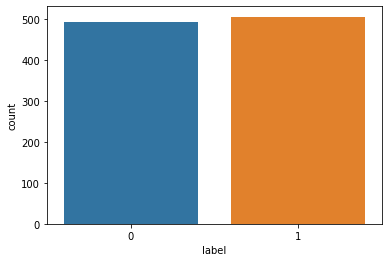

In [ ]:
sns.countplot(x = 'label',data = df)

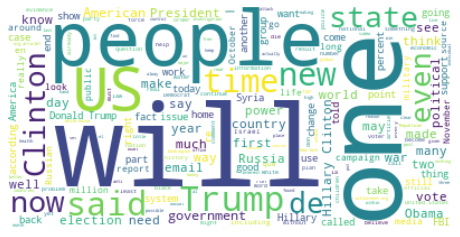

In [ ]:
## for fake

text = " ".join([x for x in df.text[df.label==1]])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

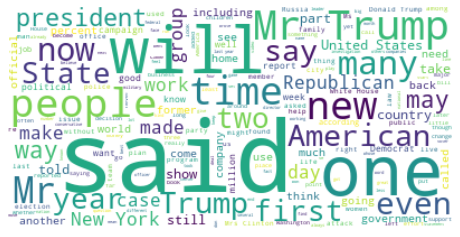

In [ ]:
## for real

text = " ".join([x for x in df.text[df.label==0]])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Define the Bert Tokenizer
# tokenizer = transformers.BertTokenizer.from_pretrained('bert-base')
X=df.drop('label',axis=1)

In [ ]:
X.head()

,id,title,author,text
19800,19800,"Clinton, FBIGate and the true depth of the Oba...",NaN,"Clinton, FBIGate and the true depth of the Oba..."
19801,19801,"Head of Turkish delegation to Russia: ""The Cri...",Jafe Arnoldski (noreply@blogger.com),"November 25, 2016 - Fort Russ News - PolitRus..."
19802,19802,Toxic chemicals found in children’s Halloween ...,RT,Toxic chemicals found in children’s Halloween ...
19803,19803,NaN,Joseph Olson,&quot;Virginia Roberts Affidavit&quot; a teen ...
19804,19804,GaiaPortal – Serrated torches cleave the undes...,Madeline,Click Here To Learn More About Alexandra's Per...


In [ ]:
y=df['label']

In [ ]:
y.head()

19800    1
19801    1
19802    1
19803    1
19804    1
Name: label, dtype: int64

In [ ]:
df.shape

(1000, 5)

In [ ]:
df=df.dropna()

In [ ]:
df.head(10)

,id,title,author,text,label
19801,19801,"Head of Turkish delegation to Russia: ""The Cri...",Jafe Arnoldski (noreply@blogger.com),"November 25, 2016 - Fort Russ News - PolitRus...",1
19802,19802,Toxic chemicals found in children’s Halloween ...,RT,Toxic chemicals found in children’s Halloween ...,1
19804,19804,GaiaPortal – Serrated torches cleave the undes...,Madeline,Click Here To Learn More About Alexandra's Per...,1
19805,19805,Will There Be Riots In America The Day After D...,Relampago Furioso,The above photo was snapped in Ferguson as thu...,1
19806,19806,"Trump Drops Truth Bombs on Cuba Regime, Polici...",Joel B. Pollak,President Donald Trump offered the most forthr...,0
19807,19807,"USA Today Sports Writer Bashes Tom Brady, Prai...",Robert J. Marlow,"Nancy Armour, writing at USA Today, believes T...",0
19808,19808,"Black Agenda Radio for Week of Nov. 7, 2016",Nellie Bailey and Glen Ford,"News, information and analysis from the black ...",1
19809,19809,Islamic State Targeting Spanish Coastal Resort...,Chris Tomlinson,The Spanish government has released a new repo...,0
19810,19810,Going Green: Marijuana Wins Big During Election,Jenna Leigh Richardson,As the Republican party claimed multiple histo...,1
19812,19812,"Hollywood, Media Mercilessly Mock Kellyanne Co...",Jerome Hudson,Media and Hollywood elites were among the many...,0


In [ ]:
messages=df.copy()
messages.reset_index(inplace=True)
messages.head(10)

,index,id,title,author,text,label
0,19801,19801,"Head of Turkish delegation to Russia: ""The Cri...",Jafe Arnoldski (noreply@blogger.com),"November 25, 2016 - Fort Russ News - PolitRus...",1
1,19802,19802,Toxic chemicals found in children’s Halloween ...,RT,Toxic chemicals found in children’s Halloween ...,1
2,19804,19804,GaiaPortal – Serrated torches cleave the undes...,Madeline,Click Here To Learn More About Alexandra's Per...,1
3,19805,19805,Will There Be Riots In America The Day After D...,Relampago Furioso,The above photo was snapped in Ferguson as thu...,1
4,19806,19806,"Trump Drops Truth Bombs on Cuba Regime, Polici...",Joel B. Pollak,President Donald Trump offered the most forthr...,0
5,19807,19807,"USA Today Sports Writer Bashes Tom Brady, Prai...",Robert J. Marlow,"Nancy Armour, writing at USA Today, believes T...",0
6,19808,19808,"Black Agenda Radio for Week of Nov. 7, 2016",Nellie Bailey and Glen Ford,"News, information and analysis from the black ...",1
7,19809,19809,Islamic State Targeting Spanish Coastal Resort...,Chris Tomlinson,The Spanish government has released a new repo...,0
8,19810,19810,Going Green: Marijuana Wins Big During Election,Jenna Leigh Richardson,As the Republican party claimed multiple histo...,1
9,19812,19812,"Hollywood, Media Mercilessly Mock Kellyanne Co...",Jerome Hudson,Media and Hollywood elites were among the many...,0


In [ ]:
messages['text'][6]

'News, information and analysis from the black left. Black Agenda Radio for Week of Nov. 7, 2016 Submitted by Nellie Bailey a... on Mon, 11/07/2016 - 19:35 Venezuela Hi-Tech Production in the Service of Humanity in Mississippi \nRenaissance Jackson, the organization that briefly won the mayor’s office in predominantly Black Jackson, Mississippi, has launched a campaign to purchase a coding and programming capacity and a 3-D fabrication facility. They call it “Fab Lab.” This technology, “if it is democratically controlled, could actually serve humanity,” said Cooperation Jackson spokesman Kali Akuno . These kinds of projects are crucial, “first and foremost, to satisfy some of the basic needs of our community, and -- on a deeper level -- to really put this means of production directly in our community’s hands.” High tech is “one of these areas of the so-called ‘digital divide’ that Black people have been sorely and strategically absent from,” said Akuno. “So, we are doing it for ourselv

In [ ]:

ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[3]

'photo snap ferguson thug burn citi could see repeat fate event perhap worsen soon citi near elect focu everi news channel ad nauseum peopl focus day elect matter win year presidenti select possibl civil unrest day elect day beyond real possibl readi chao develop nation divid like run problem ugliest scenario day elect day play trump win trump win get readi black live matter black panther race la raza racial motiv anti white group come possibl start burn citi given cart blanch year long ferguson baltimor charlott san jose worrisom preced set cours trump power day elect day wait inaugur day clean potenti mess barack hussein obama like give racial hate group green light media whip collect stradivariu play heart bleed thee sympath devil destroy nation bitch win conserv group may clash leftist right strip away hillari win real possibl protest day elect social condit white polit docil even railroad formerli nation may hold time around hillari win mean chao possibl violenc could wait start s

In [ ]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [ ]:
X.shape

(896, 5000)

In [ ]:
y=messages['label']

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
tfidf_v.get_feature_names()[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abort clinic',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'abstract',
 'absurd',
 'abus',
 'academ',
 'academi',
 'acceler',
 'acceleromet']

In [ ]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
count_df.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abort clinic,abroad,absenc,absolut,absorb,abstract,absurd,abus,academ,academi,acceler,acceleromet,accept,access,access pipelin,accid,accident,accompani,accomplish,accord,accord report,account,accur,accus,achiev,acid,acknowledg,aclu,acosta,acquir,acr,across,...,www,www voltairenet,www voltairenet org,ya,ye,yeah,year,year ago,year earlier,year later,year mr,year old,year said,year year,yell,yellow,yemen,yen,yesterday,yet,yet anoth,yield,york,york citi,york time,young,young peopl,younger,youngstown,youth,youtub,zealand,zero,zijn,zika,zionist,zone,zoot,zoot suit,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.014114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02244,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.182502,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.032949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.031511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.072431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.030188,0.0,0.040738,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.044078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.016458,0.0,0.0,0.0,0.0,0.012413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.033411,0.019066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

MultinomialNB Algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifiern=MultinomialNB()

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.824
accuracy train:   0.940
Confusion matrix, without normalization


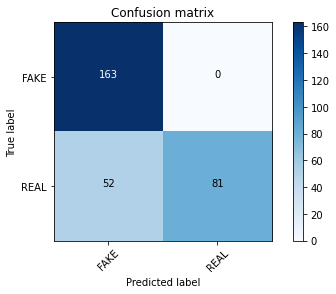

In [ ]:
classifiern.fit(X_train, y_train)
pred_tr = classifiern.predict(X_train)
score_tr = metrics.accuracy_score(y_train, pred_tr)
pred = classifiern.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
print("accuracy train:   %0.3f" % score_tr)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
classifiern.fit(X_train, y_train)
pred = classifiern.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8243243243243243

In [ ]:
y_train.shape

(600,)

Multinomial Classifier with Hyperparameter

In [ ]:
classifier=MultinomialNB(alpha=0.1)

In [ ]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_predp=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_predp)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.8175675675675675
Alpha: 0.1, Score : 0.8918918918918919
Alpha: 0.2, Score : 0.8885135135135135
Alpha: 0.30000000000000004, Score : 0.875
Alpha: 0.4, Score : 0.8682432432432432
Alpha: 0.5, Score : 0.8648648648648649
Alpha: 0.6000000000000001, Score : 0.8648648648648649
Alpha: 0.7000000000000001, Score : 0.8547297297297297
Alpha: 0.8, Score : 0.8344594594594594
Alpha: 0.9, Score : 0.831081081081081


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


Confusion matrix, without normalization


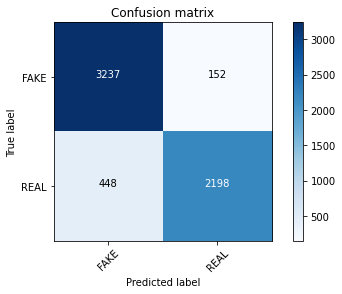

In [ ]:

cm = metrics.confusion_matrix(y_test, y_predp)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
## Get Features names
feature_names = tfidf_v.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
classifier.coef_[0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([-9.52147382, -8.98567005, -8.75019038, ..., -9.00768675,
       -8.29304531, -8.47560634])

In [ ]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-5.400573176146374, 'clinton'),
 (-5.504449523154856, 'trump'),
 (-5.689699395630465, 'hillari'),
 (-5.927658316663332, 'us'),
 (-5.943924155634382, 'elect'),
 (-6.141141898356725, 'peopl'),
 (-6.153679149791046, 'vote'),
 (-6.1855372689534684, 'state'),
 (-6.209385038898738, 'email'),
 (-6.231070569259119, 'one'),
 (-6.304754452471091, 'hillari clinton'),
 (-6.30763946084777, 'fbi'),
 (-6.325864550609382, 'would'),
 (-6.334934576217139, 'like'),
 (-6.373788650596871, 'american'),
 (-6.392869520601681, 'time'),
 (-6.398029580588211, 'war'),
 (-6.415258514684247, 'world'),
 (-6.450564452209334, 'year'),
 (-6.459455119306126, 'octob')]

In [ ]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:30]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-10.991740188222842, 'brief post'),
 (-10.991740188222842, 'follow pam'),
 (-10.991740188222842, 'follow pam key'),
 (-10.991740188222842, 'gold medal'),
 (-10.991740188222842, 'gorsuch'),
 (-10.991740188222842, 'judg gorsuch'),
 (-10.991740188222842, 'key twitter'),
 (-10.991740188222842, 'key twitter pamkeynen'),
 (-10.991740188222842, 'morn brief'),
 (-10.991740188222842, 'mr ail'),
 (-10.991740188222842, 'mr bannon'),
 (-10.991740188222842, 'mr castro'),
 (-10.991740188222842, 'mr christi'),
 (-10.991740188222842, 'mr cruz'),
 (-10.991740188222842, 'mr de'),
 (-10.991740188222842, 'mr flynn'),
 (-10.991740188222842, 'mr kushner'),
 (-10.991740188222842, 'mr roof'),
 (-10.991740188222842, 'mr sander'),
 (-10.991740188222842, 'mr scott'),
 (-10.991740188222842, 'mr session'),
 (-10.991740188222842, 'mr spicer'),
 (-10.991740188222842, 'mr xi'),
 (-10.991740188222842, 'ms trump'),
 (-10.991740188222842, 'pam key'),
 (-10.991740188222842, 'pam key twitter'),
 (-10.991740188222842, 'p

In [ ]:
X_new = X_test[100:101]

prediction = classifier.predict(X_new)
print(X)
if (prediction[0] == 0):
  print('The news in Real')
else:
  print('The news is Fake and Unreliable')

[[0. 0. 0. ... 0. 0. 0.]]
The news in Real


In [ ]:
messages[100:101]

,index,id,title,author,text,label
100,113,113,Snap Shares Leap 44% in Debut as Investors Dou...,Michael J. de la Merced,Snapchat is a business built in large part on ...,0
